In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('anime.csv')
df1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
def DB_Info(df):
    """
    Returns detailed information about the dataset such as it's data types, 
    basics statistics, number of missing values in each columns & duplicated rows
    """
    print(df.info())
    print('-'*20)
    print(df.describe(include='all'))
    print('-'*20)
    d = df.isnull().sum()
    # prints the columns with null values with a total count of null values it contains
    if d[d>0].any():
        print(d[d>0])
    else:
        print('There are no null values')
    print('-'*20)
    # prints the duplicated rows
    if df.duplicated().any():
        print(df[df.duplicated()])
    else:
        print('There are no duplicated rows')
    
DB_Info(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
--------------------
            anime_id                     name   genre   type episodes  \
count   12294.000000                    12294   12232  12269    12294   
unique           NaN                    12292    3264      6      187   
top              NaN  Shi Wan Ge Leng Xiaohua  Hentai     TV        1   
freq             NaN                        2     823   3787     5677   
mean    14058.221653                      NaN     NaN    NaN      NaN   
std     11455

In [4]:
for col in df1.columns:
    n = df1[col].unique()
    if len(n) < 10:
        print(f'{col} has {len(n)} unique values ')
    

type has 7 unique values 


In [5]:
df1['genre_list'] = df1['genre'].astype(str)
df1['genre_list'] = df1['genre_list'].str.split(', ')
df1

,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,[Hentai]
12290,5543,Under World,Hentai,OVA,1,4.28,183,[Hentai]
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,[Hentai]
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,[Hentai]


In [6]:
def tag_search(tag):
    names = []
    for i in df1.index:
        if tag in df1['genre_list'][i]:
            print(df1['name'][i])
            names.append(df1['name'][i])   
    if len(names) == 0:
        print(f"No anime with genre {tag} found")

tag_search('Seinen')


Mushishi Zoku Shou 2nd Season
One Punch Man
Mushishi Zoku Shou
Mushishi
Mushishi Zoku Shou: Suzu no Shizuku
Monster
Ping Pong The Animation
Mushishi Special: Hihamukage
Boku dake ga Inai Machi
Rainbow: Nisha Rokubou no Shichinin
Hellsing Ultimate
Kiseijuu: Sei no Kakuritsu
Uchuu Kyoudai
Ghost in the Shell: Stand Alone Complex 2nd GIG
Kingdom 2nd Season
Baccano!
Mushishi Zoku Shou: Odoro no Michi
Mononoke
Ghost in the Shell: Stand Alone Complex
One Outs
Berserk
Bungou Stray Dogs 2nd Season
Planetes
Ghost in the Shell
Berserk: Ougon Jidai-hen III - Kourin
Gyakkyou Burai Kaiji: Ultimate Survivor
Black Lagoon: The Second Barrage
Baccano! Specials
Gyakkyou Burai Kaiji: Hakairoku-hen
Initial D Final Stage
Non Non Biyori Repeat
Initial D Fourth Stage
Kingdom
Initial D First Stage
Sakasama no Patema
Ghost in the Shell: Stand Alone Complex - Solid State Society
Ghost in the Shell: Stand Alone Complex - The Laughing Man
Black Lagoon
Persona 3 the Movie 4: Winter of Rebirth
Phantom: Requiem for t

In [7]:
df1['genre_list'][0]

['Drama', 'Romance', 'School', 'Supernatural']

In [8]:
df1['genre_list'][1]

['Action', 'Adventure', 'Drama', 'Fantasy', 'Magic', 'Military', 'Shounen']

In [9]:
l = []
for i in df1.index:
    l = l + df1['genre_list'][i]
l_set = set(l)

In [10]:
len(l_set)

44

In [11]:
l_set

{'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri',
 'nan'}

<AxesSubplot:xlabel='episodes', ylabel='rating'>

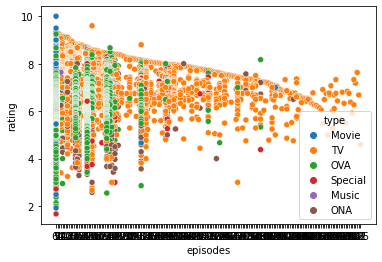

In [12]:
sns.scatterplot(x=df1['episodes'], y=df1['rating'], hue=df1['type'])

In [13]:
for col in df1.columns:
    t = df1[df1[col] == 'Unknown'].count()
print(t)

anime_id      0
name          0
genre         0
type          0
episodes      0
rating        0
members       0
genre_list    0
dtype: int64


In [14]:
filter_un = (df1 == 'Unknown').any()
filter_un

anime_id      False
name          False
genre         False
type          False
episodes       True
rating        False
members       False
genre_list    False
dtype: bool

In [15]:
df1.groupby(['episodes','type'])['type'].count()

episodes  type   
1         Movie      2311
          Music       475
          ONA         287
          OVA        1543
          Special    1061
                     ... 
Unknown   Music         1
          ONA          46
          OVA          50
          Special       5
          TV          209
Name: type, Length: 302, dtype: int64

In [16]:
df1.groupby(['type']).mean()

,anime_id,rating,members
type,,,
Movie,14898.067291,6.318058,10360.340716
Music,22445.547131,5.588996,1311.840164
ONA,23283.471927,5.643298,4114.030349
OVA,11322.082150,6.375221,5986.139837
Special,16666.279833,6.523501,7676.060859
TV,11966.169527,6.902299,42683.658305


In [17]:
df1['eps'] = df1['episodes']

In [18]:
df1['eps'].replace('Unknown', np.nan)

0         1
1        64
2        51
3        24
4        51
         ..
12289     1
12290     1
12291     4
12292     1
12293     1
Name: eps, Length: 12294, dtype: object

In [40]:
(df1==pd.NA).any()

anime_id      False
name          False
genre         False
type          False
episodes      False
rating        False
members       False
genre_list    False
eps           False
ep            False
dtype: bool

In [20]:
df1.groupby(['eps','type'])['type'].count()

eps      type   
1        Movie      2311
         Music       475
         ONA         287
         OVA        1543
         Special    1061
                    ... 
Unknown  Music         1
         ONA          46
         OVA          50
         Special       5
         TV          209
Name: type, Length: 302, dtype: int64

In [21]:
df1['ep'] = pd.to_numeric(df1['eps'], errors='coerce').astype('Int32')

In [22]:
df1['ep']==np.nan

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: ep, Length: 12294, dtype: boolean

In [23]:
df1.drop(['eps'], axis=1)

,anime_id,name,genre,type,episodes,rating,members,genre_list,ep
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",64
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",51
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]",24
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",51
...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,[Hentai],1
12290,5543,Under World,Hentai,OVA,1,4.28,183,[Hentai],1
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,[Hentai],4
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,[Hentai],1


Text(0, 0.5, 'Ratings')

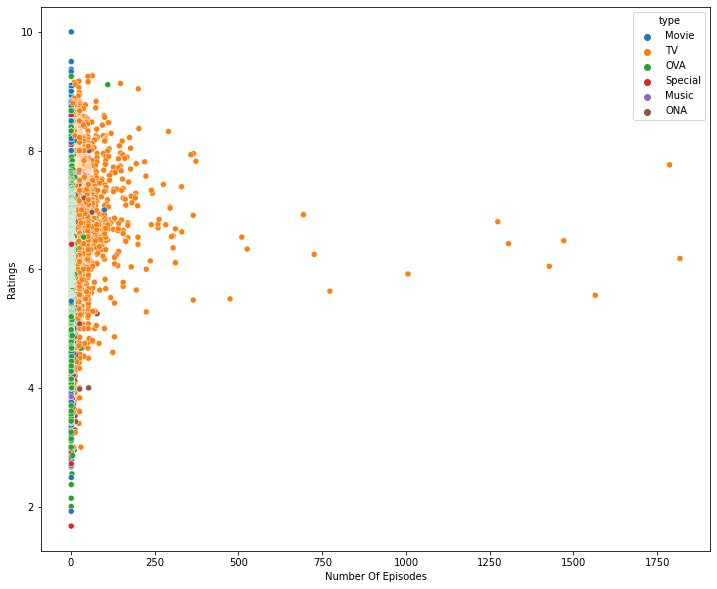

In [24]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df1['ep'], y=df1['rating'], hue=df1['type'])
plt.xlabel('Number Of Episodes')
plt.ylabel('Ratings')

In [42]:
df1[df1['rating']>9].max()

anime_id                                33662
name          Yakusoku: Africa Mizu to Midori
genre                           Slice of Life
type                                       TV
episodes                              Unknown
rating                                   10.0
members                                793665
genre_list                    [Slice of Life]
eps                                   Unknown
ep                                        201
dtype: object

In [26]:
df1['genre_list']

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre_list, Length: 12294, dtype: object

In [27]:
df2 = df1.explode('genre_list')

In [43]:
df2.drop(['genre','eps'], axis=1, inplace=True)

Text(0, 0.5, 'Members')

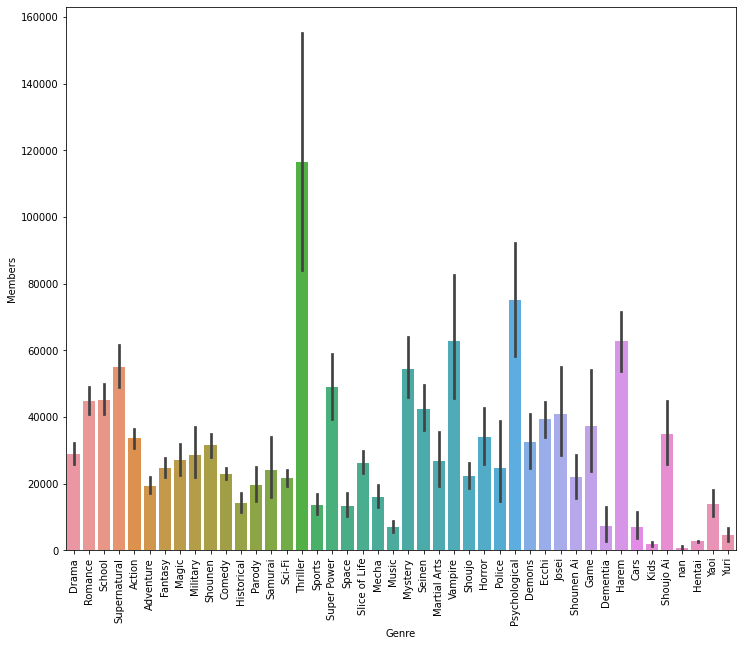

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(x=df2['genre_list'], y=df2['members'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Members')

<AxesSubplot:xlabel='type', ylabel='count'>

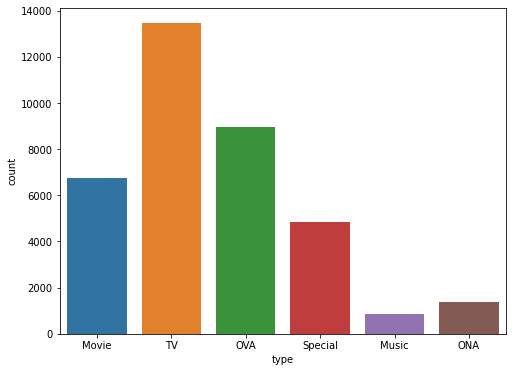

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=df2)

<AxesSubplot:xlabel='type', ylabel='members'>

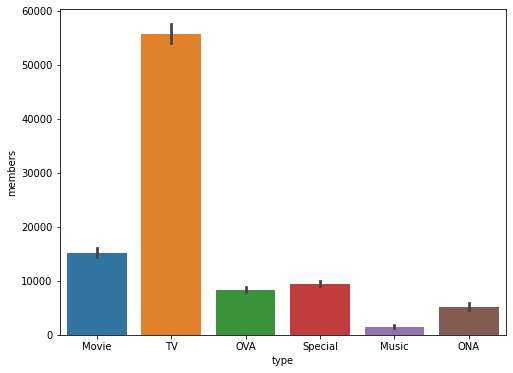

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x='type',y='members', data=df2)